<a href="https://colab.research.google.com/github/Roberto-Ulises-Cruz-Olivares/EDPI/blob/main/Series_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de Fourier
En este codigo voy a construir las graficas de algunas funciones de fourier comparando su aproximacion con la grafica original.

In [1]:
#Importamos la librerias
from pylab import *
import matplotlib.pyplot as plt
import numpy as np

**Aqui definimos la funcion a trozos**

In [95]:
def funcion(x):
    y = np.piecewise(x,
                     [np.logical_and(x < 0, x >= -2), np.logical_and(x >= 0, x <= 2)], # Aqui se definen los intervalos
                     [lambda x: 0, lambda x: 2-x]) # Aqui se definen las funciones
    return y


Mostramos visualmente nuestra funcion a trozos

In [110]:
import sympy as sp

x = sp.symbols('x')
f = sp.Piecewise(
    (0, (x >= -2) & (x < 0)),
    (2 - x, (x >= 0) & (x < 2)),
)

#sp.pprint(f)  # Imprime en texto bonito en la terminal
sp.init_printing()  # Habilita impresión en formato LaTeX en Colab
f  # Muestra la función bien formateada

⎧  0    for x ≥ -2 ∧ x < 0
⎨                         
⎩2 - x  for x ≥ 0 ∧ x < 2 

**Aqui podemos imprimir nuestra funcion anterior con 1000 muestras**

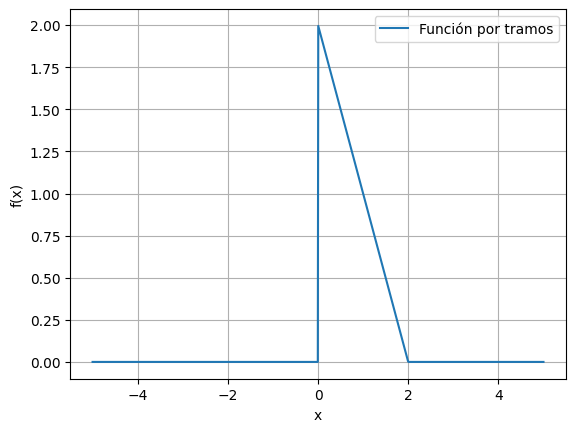

In [96]:
x = np.linspace(-5, 5, 1000)  # Se define x fuera de la función
f = funcion(x) # Llamada de la funcion

plt.plot(x, f, label="Función por tramos")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show() # Muestra la llamada de la funcion

**Aqui se realiza la magia de aproximacion de nuestra serie de fourier**

In [103]:
def u_0(x,N=60): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += ( (2/((n*pi)**2)) * (((-1*(-1)**n))+1) * cos((n*pi*x)/2) ) + ( ( 2/(n*pi) ) * sin((n*pi*x)/2) ) # Sumatoria de la serie
    return 0.5+f # Suma de la sumatria con 1/2 de a_0

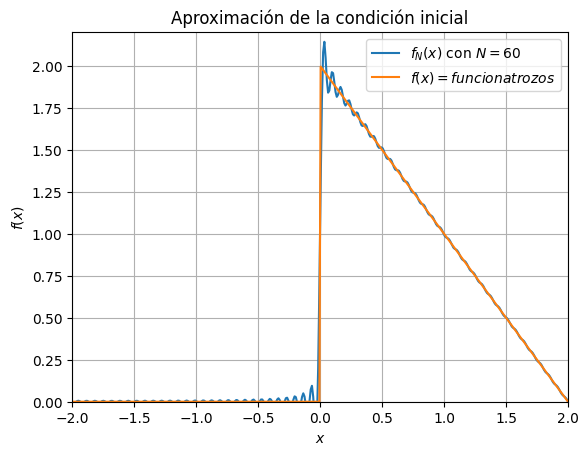

In [105]:
# Compara la serie de fourier con la original para observar su aproximacion
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=60$')
plot(x,f,label='$f(x)=funcion a trozos$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-2,2]),ylim([0,2.2]),grid(),legend()
show()

**Podemos observar que se cumple el teorema de convergencia puntual en la funcion a trozos, su serie de fourier converge puntualmente**

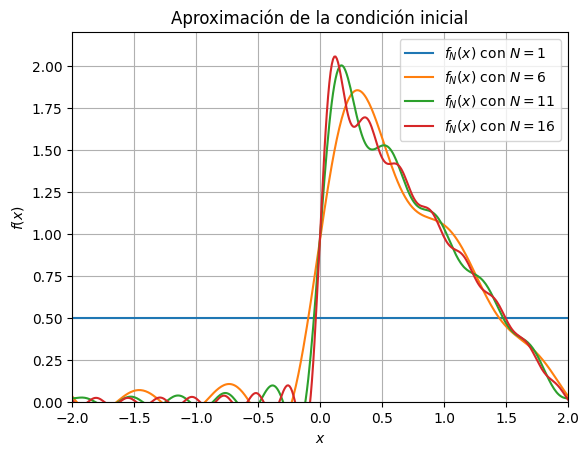

In [107]:
# IMPRIME LA SERIE DE FOURIER CON VARIOS ARMONICOS
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-2,2]),ylim([0,2.2]),grid(),legend()
show()